## Clasificacion de digitos usando Redes Convolucionales con Keras

### 1. Set de datos

Se implementara una red neuronal convolucional para clasificacion de digitos escritos a mano (0-9) por medio del dataset MNIST, el cual contiene 70.000 imagenes de digitos escritos por personas diferentes.

Se abarcara en este ejercicio:

1. La arquitectura LeNet-5, que es la red convolucional usada en este tutorial.
2. Interpretar la red convolucional con Keras.
3. Metricas de desempeno de la red y su prediccion.

### 2. LeNet-5

Esta red se creo especificamente para este caso, en donde se procesan imagenes de 28x28x1 - 28 filas, 28 columnas y 1 solo plano de color (escala de grises).

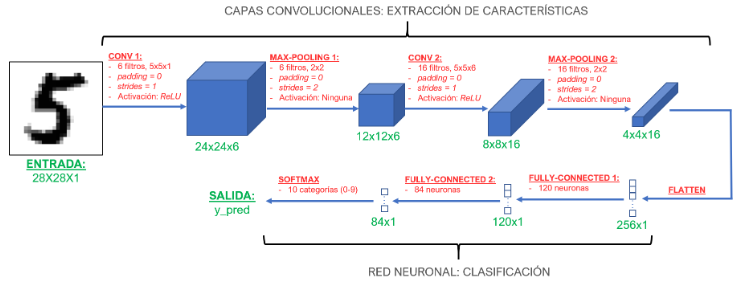

Esta red cuenta con dos bloques de procesamiento:

* Las capas convolucionales que extraen caracteristicas de las imagenes.
* La red neuronal, que toma estas caracteristicas y las clasifica segun la categoria de digitos del 0 al 9.

Tambien se observan ciertas caracteristicas de los bloques en general:

* Despues de realizar las convoluciones se usa siempre la funcion de activacion ReLU.
* El max pooling se realiza despues de las convoluciones.
* Las dimensiones de las imagenes se reducen entre una capa y la otra, mientras que la profundidad (caracteristicas extraidas) aumenta entre una capa y otra.

### 3. Implementacion en Keras

#### 3.1. Librerias

In [1]:
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt

Importamos las librerias con las que construiremos la red con Keras:

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.optimizers import SGD

#### 3.2. Preprocesamiento del set de datos

la funcion *mnist* de Keras permite leer el set de datos y crear automaticamente los sets de entrenamiento y validacion. El primero de ellos tendra 60.000 imagenes (28x28 cada una) con sus categorias correspondientes, mientras que el segundo tendra 10.000 datos.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Se normalizan los pixeles de las imagenes para tener valores entre 0 y 1

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

Se convierten a numericas las categorias de salida usando el formato one-hot:

In [6]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

Visualizamos una imagen del dataset

(-0.5, 27.5, 27.5, -0.5)

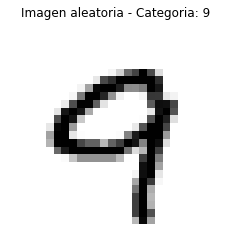

In [21]:
n_imagen = np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[n_imagen,:].reshape(28,28), cmap = 'gray_r')
plt.title('Imagen aleatoria - Categoria: ' + str(np.argmax(y_train[n_imagen])))
plt.axis('off')

Para la generacion del modelo en Keras, se requiere cada dato de entrada en el formato:

 *n_imagenes} x n_filas x n_columnas x n_canales*

* n_imagenes = Total de imagenes de entrada
* n_filas, n_columnas = dimension de cada imagen (28x28)
* n_canales = Capas de color, en este caso como es escala de gris = 1


In [27]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1) # (60000,28,28,1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1) # (10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### 3.3. Creacion del modelo

Segun el modelo LeNet-5 construimos la red neuronal:

1. Creamos el contenedor con ``` Sequential() ```

In [37]:
modelo = Sequential()

Anadimos de forma secuencial, las capas de la red convolucional, usando ```Conv2D``` para las capas convolucionales y ```MasPooling2D```, finalmente ```Flatten``` y ```Dense``` para la etapa de clasificacion y la capa de salida.

2. Aplicamos la primera Convolucion y el primer Max Pooling:

In [38]:
modelo.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', 
                    input_shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3])))

modelo.add(MaxPooling2D(pool_size = (2,2)))

3. Aplicamos el la segunda Convolucion y Max Pooling:

In [39]:
modelo.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
modelo.add(MaxPooling2D(pool_size = (2,2)))

Aplanamos el resultando, aplicamos la funcion de activacion ReLU a las capas ocultas y aplicamos la transformacion a la capa de salida para la clasificacion:

In [40]:
modelo.add(Flatten())
modelo.add(Dense(120, activation = 'relu'))
modelo.add(Dense(84, activation = 'relu'))
modelo.add(Dense(n_classes, activation = 'softmax'))

#### 3.4. Compilacion del modelo

En esta etapa se define el optimizador a usar (en este caso el Gradiente Descendente con una tasa de aprendizaje de 0.1), la funcion de error (entropia cruzada) y la metrica de desempeno (precision).

In [41]:
sgd = SGD(lr = 0.1)
modelo.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

#### 3.5. Entrenamiento

Realizamos el entrenamiento con 10 iteraciones, una lr=0.1 y un tamano de lote de 128 imagenes por iteracion.

En el entrenamiento podemos incluir los datos de validacion en este caso para calcular la metrica de precision (validation_data).

In [42]:
n_epochs = 10
batch_size = 128
modelo.fit(x_train, y_train, epochs = n_epochs, batch_size = batch_size, verbose = 1, 
           validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.4363 - accuracy: 0.8579 - val_loss: 0.1218 - val_accuracy: 0.9608
Epoch 2/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.1129 - accuracy: 0.9648 - val_loss: 0.1202 - val_accuracy: 0.9615
Epoch 3/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0799 - accuracy: 0.9753 - val_loss: 0.0809 - val_accuracy: 0.9737
Epoch 4/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.0704 - val_accuracy: 0.9766
Epoch 5/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0481 - val_accuracy: 0.9838
Epoch 6/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0572 - val_accuracy: 0.9805
Epoch 7/10
60000/60000 [==============================] 

En la ultima iteracion, el modelo alcanza una precision de 99.17% para el set de entrenamiento y 98.3% para los datos de validacion.

### 4. Desempeno del modelo

Para analizar el desempeno puntual del modelo y determinar las predicciones erroneas podemos aplicar la matriz de confusion, que dado el numero de categorias de este dataset, seria una matriz 10x10.

Creamos una funcion personalizada para aplicar la matriz de confusion al modelo:

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    # Generar figura
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')

    # Rotar y alinear ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Implementamos la prediccion con los datos de validacion y graficamos la matriz de confusion:

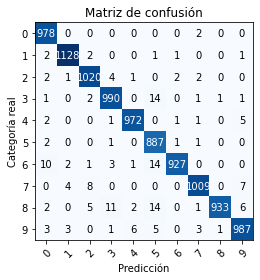

In [44]:
y_pred = modelo.predict_classes(x_test)
y_ref = np.argmax(y_test, axis = 1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)

In [45]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

#### 4.1. Prediccion con datos de validacion

Ponemos el modelo a prueba con los datos de validacion y comparamos su valor real con la prediccion realizada:

(-0.5, 27.5, 27.5, -0.5)

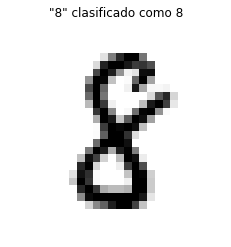

In [86]:
# Selecciono una imagen cualquiera de los datos de validacion
n_imagen_test = np.random.randint(0, x_test.shape[0])

# Redimensiono la imagen tomada de los datos de prueba, en formato 28x28 
img = x_test[n_imagen_test,:].reshape(28,28)

# Ubico la categoria real de la imagen seleccionada
cat_original = np.argmax(y_test[n_imagen_test,:])

# Aplico una prediccion sobre esa imagen para determinar su categoria
cat_prediccion = y_pred[n_imagen_test]

# Grafico la imagen real seleccionada
plt.imshow(img, cmap = 'gray_r')

# Comparo la categoria real con el resultado de la prediccion
plt.title('"{}" clasificado como {}'.format(cat_original, cat_prediccion))
plt.axis('off')